For this assignment, we will be working with the [US Health Insurance Dataset]('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv') from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?
---
For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#import csv
df = pd.read_csv('/Users/Rashad/Documents/GitHub/Hypothesis Testing with Insurance Data_CORE/Hypothesis-Testing-with-Insurance-Data_CORE/Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?

* Metric measurement:  'charges'
* This is a NUMERIC test.
* There are two sample groups (smokers and non-smokers)

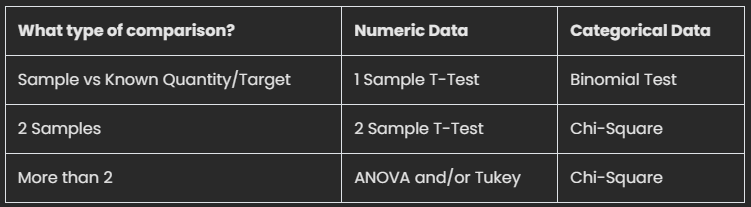

***Null Hypothesis:***  The average charge of smokers is not significantly higher than the average charge of non-smokers.

***Alternate Hypothesis:***  The average charge of smokers is higher than the average charge of non-smokers.

In [4]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## 2 Sample T-Test
Does data meet the assumptions of this test before proceeding?
* No significant outliers
* Normality
* Equal Variance

### Filtering data and getting group averages.

In [5]:
#Filtering data.

# If I wanted to take a random sample of my dataframe, I would use the
# below (commented out) line of code.
#    sample = df.sample(n=1338,random_state=23)

#Series of smoker charges
smoker_charges = df.loc[ df['smoker']=='yes',"charges"]
#Series of non-smoker charges
non_smoker_charges = df.loc[ df['smoker']=='no',"charges"]

## Getting means\averages for smoker and non-smoker charges
print(f"The total Number of observations across all groups:  N={len(smoker_charges)+len(non_smoker_charges)}")
print(f"For SMOKERS (n={len(smoker_charges)}):  Mean\Average={np.mean(smoker_charges):.2f}")
print(f"For NON-SMOKERS (n={len(non_smoker_charges)}):  Mean\Average={np.mean(non_smoker_charges):.2f}")

The total Number of observations across all groups:  N=1338
For SMOKERS (n=274):  Mean\Average=32050.23
For NON-SMOKERS (n=1064):  Mean\Average=8434.27


In [6]:
#quick view of dataframe
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


### Visualization of smoker charges compared to non-smoker charges.

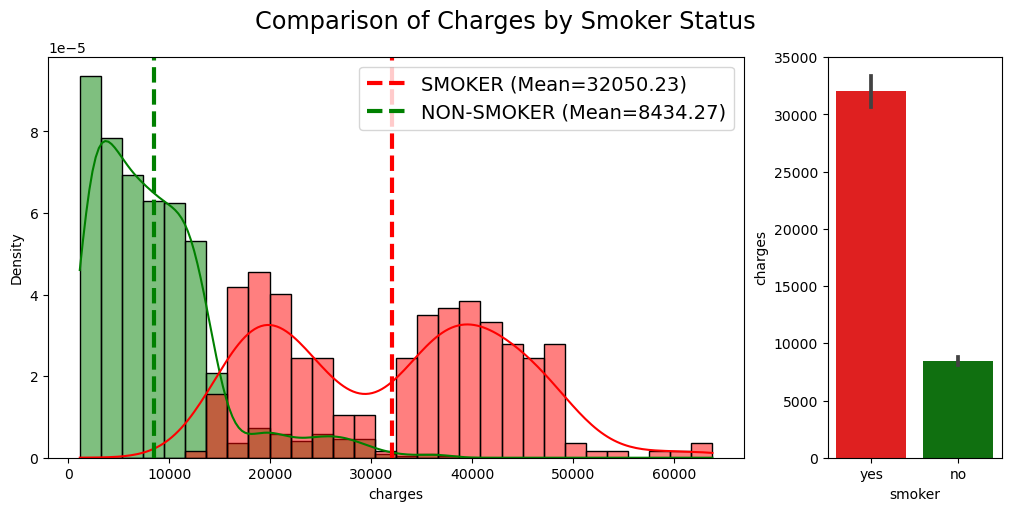

In [7]:
smoker_palette={'yes':'red', "no":"green"}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"SMOKER (Mean={np.mean(smoker_charges):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"NON-SMOKER (Mean={np.mean(non_smoker_charges):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoker Status',fontsize='xx-large');

### Testing Assumptions
1. No significant OUTLIERS
2. NORMALITY
3. EQUAL VARIANCE

#### 1. Testing for Outliers - (using Z-scores.)
NOTE:  Typically z-scores greater than 3 are considered outliers. 

In [8]:
#Smoker Z-Score
zscores_smoker = stats.zscore(smoker_charges)
outliers_smoker = abs(zscores_smoker)>3
print( f"Z-Score for SMOKERS:  {np.sum(outliers_smoker)}" )

Z-Score for SMOKERS:  0


If Z-score is greater than 3 (z>3), then outliers exist.

---

Our z-score for SMOKERS is 0.  There are no outliers in this group.

In [9]:
#Non-Smoker Z-Score
zscores_non_smoker = stats.zscore(non_smoker_charges)
outliers_non_smoker = abs(zscores_non_smoker)>3
print( f"Z-Score for NON-SMOKERS:  {np.sum(outliers_non_smoker)}" )

Z-Score for NON-SMOKERS:  24


If Z-score is greater than 3 (z>3), then outliers exist.

---

Our z-score for NON-SMOKERS is 24.  There are outliers in this group.
* Removing outliers in the following cell.

In [10]:
#Removing outliers from non_smoker group.
## ONLY REMOVE AN OUTLIER ONCE,
## REGARDLESS OF INITIAL VALUE THAT INDICATED THAT REMOVAL WAS NEEDED.

non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

#### 2. Testing for Normality - (using D’Agostino-Pearson’s Normality Test)
If alpha = 0.05,

* p < 0.05 (p < alpha)
    * A p-value less than 0.05 means to reject the null hypothesis (and we accept\support the alternative hypothesis).

* p > 0.05 (p > alpha)
    * A p-value greater than 0.05 means to accept the null hypothesis (we fail to reject the null hypothesis).

In [11]:
#testing the SMOKER group for Normality
SMOKER_normality = stats.normaltest(smoker_charges)
SMOKER_normality

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [12]:
#testing the NON-SMOKER group for Normality
NON_SMOKER_normality = stats.normaltest(non_smoker_charges)
NON_SMOKER_normality

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

The p-values for both smoker and non_smoker are both less than 0.05.  This data is not normally distributed.

##### ***NOTE:  Because the data is not normally distributed, but we have a large enough sample\groups sizes (n) (where our smallest group size is n=274), we can safely ignore the normality assumption and continue on to testing equal variance***

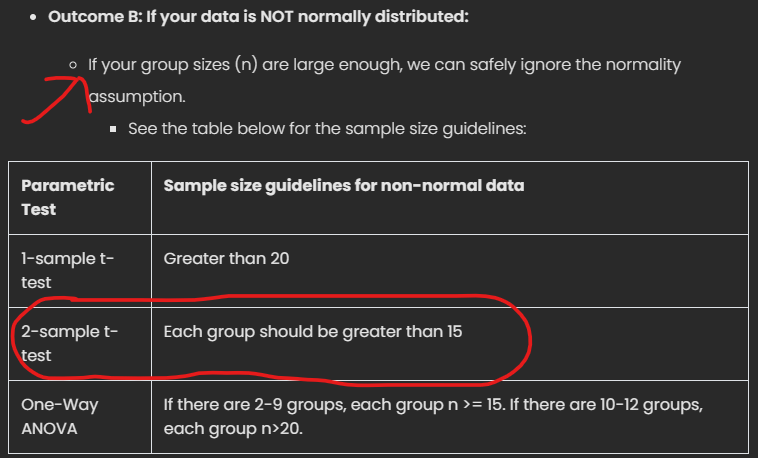

#### Testing for Equal Variance - (using Levene's Test)
* If P-value is greater than alpha (p > 0.05):  We **accept** the null null hypothesis that the samples come from populations with equal variances. Therefore, we accept that **our groups DO have equal variance.**

* If P-value is less than alpha (p < 0.05): We **reject** the null hypothesis that the samples come from populations with equal variances. Therefore, we accept that **our groups DO NOT have equal variance.**

In [13]:
# Test for equal variance using Levene test.
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

P-value is less than 0.05 for the our Equal Variance test.  **Our groups DO NOT have equal variance.**

### T-Test - (using Welch's T-test)
* Using Welch's T-test because we failed the assumption of equal variance.

If P-value is less than alpha (p < 0.05):
* We reject the null hypothesis and accept\support the alternative hypothesis.

If P-value is greater than alpha (p > 0.05):
* We accept the null hypothesis (i.e. fail to reject the null hypothesis).

In [14]:
from scipy.stats import ttest_ind

In [15]:
## Final t-test, after completing assumptions testing.
test_result = stats.ttest_ind(smoker_charges,non_smoker_charges, equal_var=False)
test_result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [16]:
## is our test result significant
print(f"p-value={test_result.pvalue:.10f}")
print(f"Significant: {test_result.pvalue <.05}")

p-value=0.0000000000
Significant: True


Based on our t-test, we have a significant result.  P-value is less than 0.05.

**A significant result (p < 0.05) means we reject the null hypothesis and support the alternative hypothesis.**  In this case, this means that there IS a difference between insurance charges between those who smoke and those who do not smoke.

# Q2. Are men more likely to smoke than women?

1. Metric Measurement:  'smoker'
2. This is a CATEGORICAL test.
3. There are two sample groups (men and women)

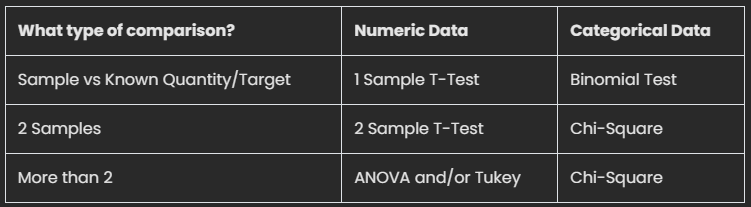

***Null Hypothesis:***  The number average number of men who smoke is less than the average number of women who smoke.

***Alternate Hypothesis:***  The number average number of men who smoke is greater than the average number of women who smoke.

In [17]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## Chi-Square Test
Does the data meet the assumptions of this test before proceeding?

1. There are two categorical variables (ordinal or nominal)
    * YES.  To categorical variables are nominal.
2. The outcomes are independent.
    * YES.  They have no dependency opon each other.  Gender is not dependent on the smoker variable.

### Visualizing smokers among males and females.

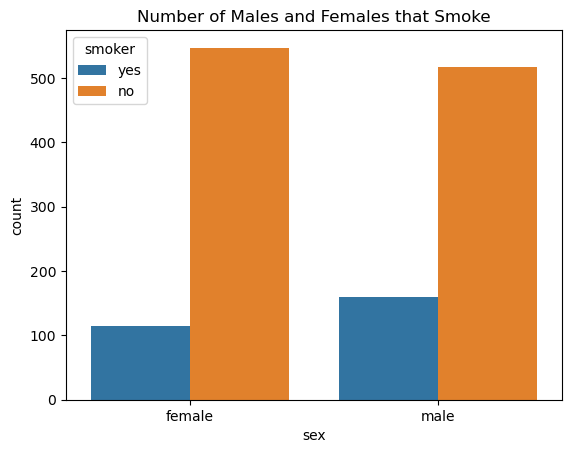

In [18]:
#Visualizing the males and females who smoke.
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Males and Females that Smoke");

### Getting the required Contingency Table for the Chi-Squared Test with `pd.crosstab`

In [19]:
# calculate the contingency table with pd.cross-tab
contingency_table = pd.crosstab(df['sex'], df['smoker'])
contingency_table

smoker,no,yes
sex,,
female,547,115
male,517,159


## Running Chi-Squared Test.
p < 0.05

* A p-value less than 0.05 means our distribution is significantly different than a normal distribution. **A p-value less than 0.05 tells us we can reject the null hypothesis (accept\support the alternate hypothesis).**

p > 0.05

* A p-value greater than 0.05 would say that there is no statistical difference between our distribution and a normal distribution which means the tested distribution should be considered normal.  **A p-value greater than alpha (0.05) means we fail to reject the null hypothesis (we accept the null hypothesis).**

In [20]:
# Running the Chi-Square test and saveing the output.
chi2_result = stats.chi2_contingency(contingency_table)
chi2, p, deg_free, expected_vals = chi2_result #this labels the results

In [21]:
# What was our p-value?
print(f"P-value is:  {p}")

P-value is:  0.006548143503580696


P-value is less than 0.05 and we can reject the null hypothesis.  **The data supports the Alternate Hypothesis that men on average smoke more than women.**

# Q3. Do different regions have different charges, on average?
* Metric measurement:  'charges'
* This is a NUMERIC test.
* There four sample groups (southeast, southwest, northeast, and northwest)

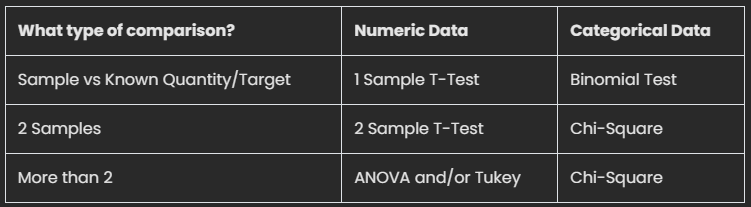

***Null Hypothesis:***  All regions do not have significantly different average charges.

***Alternate Hypothesis:***  All regions have significantly different average charges.

In [22]:
#quick view of dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
#Checking number of regions and their individual number of instances.
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

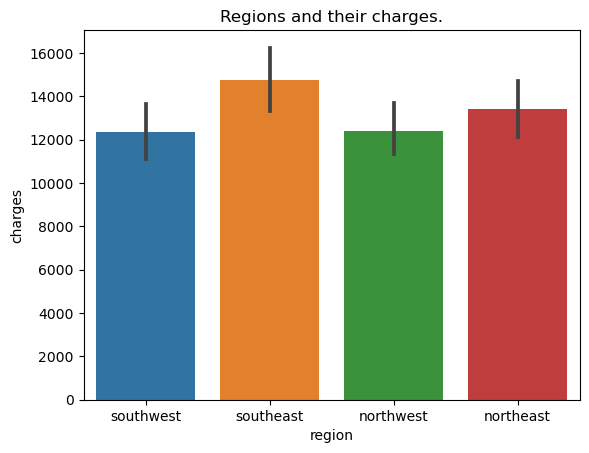

In [24]:
# visualisation of data.
ax = sns.barplot(data=df, x='region',y='charges')
ax.set_title("Regions and their charges.");

In [25]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## One Way ANOVA
Does the data meet the assumptions of this test before proceeding?
* No significant outliers
* Equal variance
* Normality

### Identifying Outliers - (using Z-Scores)
NOTE:  Typically z-scores greater than 3 are considered outliers. 

In [26]:
#Series of southwest charges
southwest_charges = df.loc[ df['region']=='southwest',"charges"]
#Series of southeast charges
southeast_charges = df.loc[ df['region']=='southeast',"charges"]
#Series of northwest charges
northwest_charges = df.loc[ df['region']=='northwest',"charges"]
#Series of northeast charges
northeast_charges = df.loc[ df['region']=='northeast',"charges"]

## Getting means\averages for smoker and non-smoker charges
print(f"The total Number of observations across all groups:  N={len(southwest_charges)+len(southeast_charges)+len(northeast_charges)+len(northwest_charges)}")
print(f"For SOUTHWEST (n={len(southwest_charges)}):  Mean\Average={np.mean(southwest_charges):.2f}")
print(f"For SOUTHEAST (n={len(southeast_charges)}):  Mean\Average={np.mean(southeast_charges):.2f}")
print(f"For NORTHWEST (n={len(northwest_charges)}):  Mean\Average={np.mean(northwest_charges):.2f}")
print(f"For NORTHEAST (n={len(northeast_charges)}):  Mean\Average={np.mean(northeast_charges):.2f}")

The total Number of observations across all groups:  N=1338
For SOUTHWEST (n=325):  Mean\Average=12346.94
For SOUTHEAST (n=364):  Mean\Average=14735.41
For NORTHWEST (n=325):  Mean\Average=12417.58
For NORTHEAST (n=324):  Mean\Average=13406.38


In [27]:
#SOUTHWEST Z-Score
zscores_sw = stats.zscore(southwest_charges)
outliers_sw = abs(zscores_sw)>3
print( f"Z-Score for SOUTHWEST:  {np.sum(outliers_sw)}" )

Z-Score for SOUTHWEST:  8


In [28]:
#Removing outliers from SOUTHWEST group.
## ONLY REMOVE AN OUTLIER ONCE,
## REGARDLESS OF INITIAL VALUE THAT INDICATED THAT REMOVAL WAS NEEDED.

southwest_charges = southwest_charges[(np.abs(stats.zscore(southwest_charges)) < 3)]

In [29]:
#SOUTHEAST Z-Score
zscores_se = stats.zscore(southeast_charges)
outliers_se = abs(zscores_se)>3
print( f"Z-Score for SOUTHEAST:  {np.sum(outliers_se)}" )

Z-Score for SOUTHEAST:  2


In [30]:
#NORTHWEST Z-Score
zscores_nw = stats.zscore(northwest_charges)
outliers_nw = abs(zscores_nw)>3
print( f"Z-Score for NORTHWEST:  {np.sum(outliers_nw)}" )

Z-Score for NORTHWEST:  7


In [31]:
#Removing outliers from NORTHWEST group.
## ONLY REMOVE AN OUTLIER ONCE,
## REGARDLESS OF INITIAL VALUE THAT INDICATED THAT REMOVAL WAS NEEDED.

northwest_charges = northwest_charges[(np.abs(stats.zscore(northwest_charges)) < 3)]

In [32]:
#NORTHEAST Z-Score
zscores_ne = stats.zscore(northeast_charges)
outliers_ne = abs(zscores_ne)>3
print( f"Z-Score for NORTHEAST:  {np.sum(outliers_ne)}" )

Z-Score for NORTHEAST:  4


In [33]:
#Removing outliers from NORTHEAST group.
## ONLY REMOVE AN OUTLIER ONCE,
## REGARDLESS OF INITIAL VALUE THAT INDICATED THAT REMOVAL WAS NEEDED.

northeast_charges = northeast_charges[(np.abs(stats.zscore(northeast_charges)) < 3)]

## Normality
-Test size (n) is large enough for each group (where n in each group is greater than 300) where normality testing is not needed.

In [34]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [35]:
### checking significant differences with pandas 
norm_results_df['significant diff'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,significant diff
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


p < 0.05

* A p-value less than 0.05 means our distribution is significantly different than a normal distribution. A p-value less than .05 tells us we can reject the null hypothesis (accept the alternate hypothesis).

p > 0.05

* A p-value greater than 0.05 would say that there is no statistical difference between our distribution and a normal distribution which means the tested distribution should be considered normal.  We accept the null hypotheses (fail to reject the null hypothesis).

All regions have a p-value greater than 0.05.  This supports the Alternative Hypothesis.

**Because all of our sample points are greater than 15, we can safely ignore the normality assumption.**

## Testing Equal Variance

In [36]:
#unpacking all values in the group with the * operator 

result = stats.levene(*groups.values())
result

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

P-value is less than 0.05.  We DO NO have equal variance.  Rejecting the null hypothesis

## T-test

In [37]:
# Independent t-test with equal_var set to False
kw_result = stats.kruskal(*groups.values())
kw_result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

P-VALUE is greater than 0.05.  We would accept the null hypothesis (fail to reject the NULL Hypothesis.)